In [23]:
import os
import joblib
import numpy as np
from results import *
from datasets import *
from hyperparameters import *
from matplotlib import pyplot  as plt

In [24]:
datasets_folder = os.getcwd() + "/datasets/"
experiments_folder = os.getcwd() + "/experiments/"
scaff_results_folder = experiments_folder + "local_sub/"
datasets = [dataset for dataset in datasets if "multiple" not in dataset]

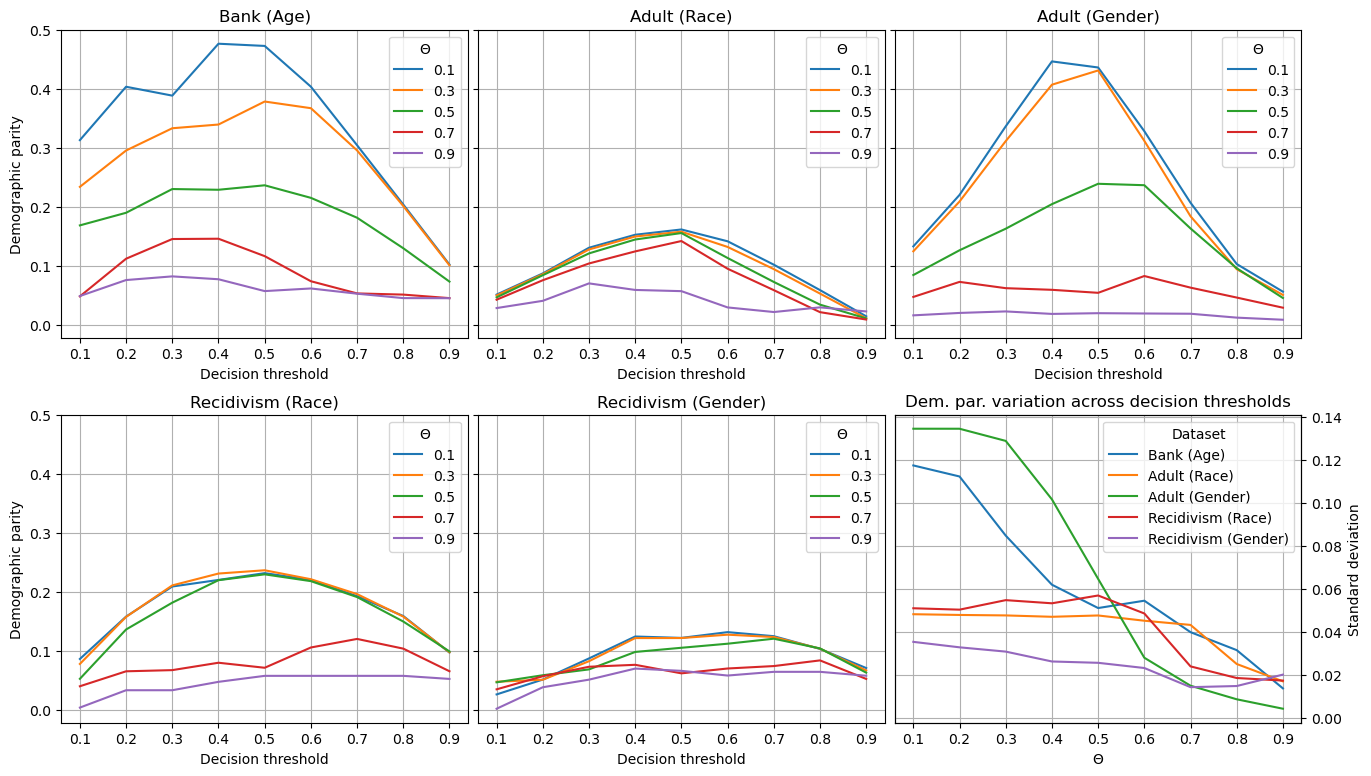

In [25]:
quantiles = np.linspace(0.1,0.9,9).round(1)
thetas = np.linspace(0.1, 0.9, 5).round(1)
fig, axs = plt.subplots(2,3,dpi=100, figsize=(16,9), sharex=False, sharey=True)
axs = axs.ravel()
for i in range(len(datasets)):
    ax = axs[i]
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
   
    for theta in thetas:    
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = demographic_parity(s_test, y_pred)
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        stdv_dem_pars = np.std(folds_dem_pars, axis=0, ddof=0) # across quantiles (9)

        ax.plot(quantiles, mean_dem_pars, label=str(theta))
        
    ax.grid()
    title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.set_title(title)
    
    ax.legend(title=r"$\Theta$")
    ax.set_xlabel("Decision threshold")
    if i in [0,3]:
        ax.set_ylabel("Demographic parity")
    
ax = axs[5].twinx()
thetas = np.linspace(0.1, 0.9, 9).round(1)
for i in range(len(datasets)):
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
    
    
    theta_dem_par_vars = []
    for theta in thetas:
        
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = demographic_parity(s_test, y_pred)
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        theta_dem_par_var = np.std(mean_dem_pars, ddof=0)
        theta_dem_par_vars.append(theta_dem_par_var)
    
    var_title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.plot(thetas, theta_dem_par_vars, label=var_title)

ax.legend(title="Dataset")
ax.set_title("Dem. par. variation across decision thresholds")
ax.set_ylabel("Standard deviation")    
ax.grid(True, axis="y")
axs[5].grid(True, axis="x")
axs[5].set_xlabel(r"$\Theta$")
axs[5].tick_params(left=False)

plt.subplots_adjust(
    wspace=0.025, 
    hspace=0.25
)
plt.savefig("dem_parity.svg", format="svg")
plt.show()

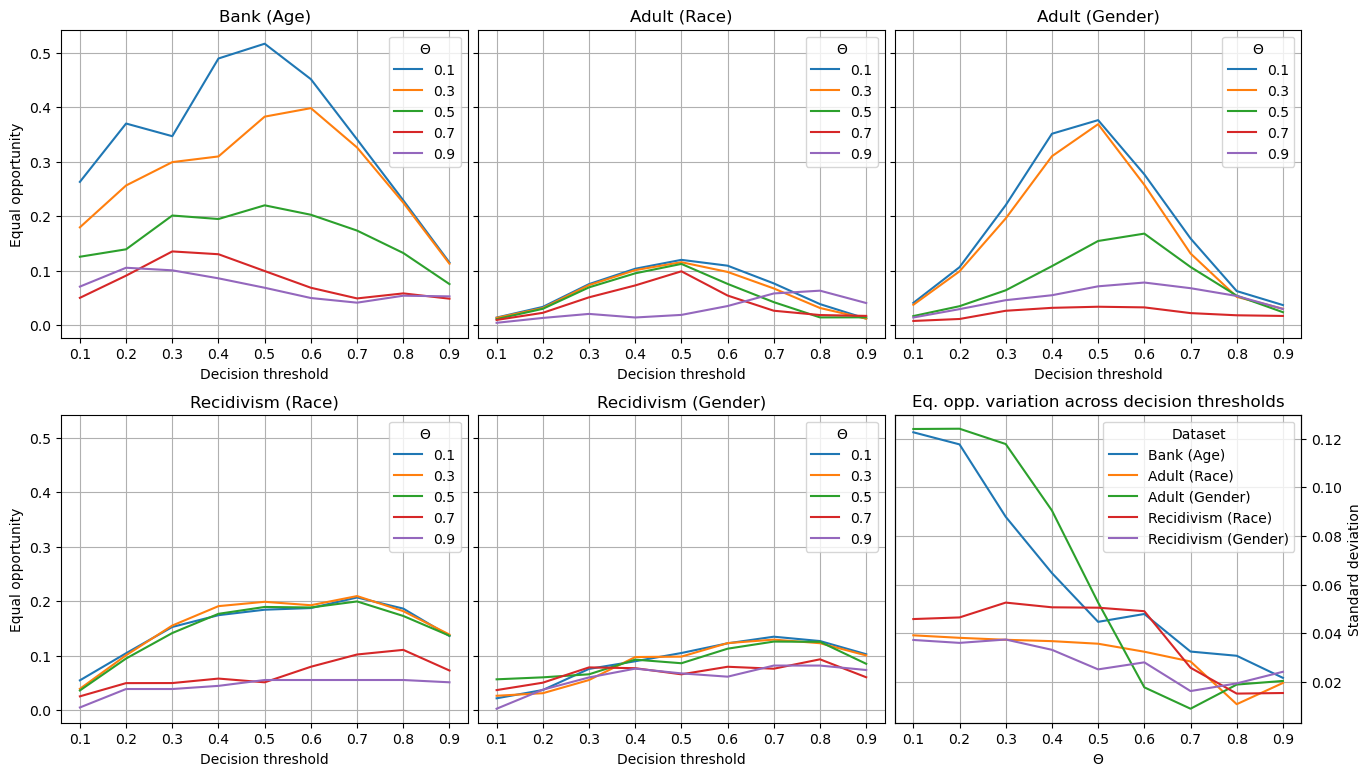

In [21]:
quantiles = np.linspace(0.1,0.9,9).round(1)
thetas = np.linspace(0.1, 0.9, 5).round(1)
fig, axs = plt.subplots(2,3,dpi=100, figsize=(16,9), sharex=False, sharey=True)
axs = axs.ravel()
for i in range(len(datasets)):
    ax = axs[i]
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
   
    for theta in thetas:    
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = equal_odds_tpr(s_test, y_pred, y_test)
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        stdv_dem_pars = np.std(folds_dem_pars, axis=0, ddof=0) # across quantiles (9)

        ax.plot(quantiles, mean_dem_pars, label=str(theta))
        
    ax.grid()
    title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.set_title(title)
    
    ax.legend(title=r"$\Theta$")
    ax.set_xlabel("Decision threshold")
    if i in [0,3]:
        ax.set_ylabel("Equal opportunity")
    
ax = axs[5].twinx()
thetas = np.linspace(0.1, 0.9, 9).round(1)
for i in range(len(datasets)):
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
    
    
    theta_dem_par_vars = []
    for theta in thetas:
        
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = equal_odds_tpr(s_test, y_pred, y_test)
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        theta_dem_par_var = np.std(mean_dem_pars, ddof=0)
        theta_dem_par_vars.append(theta_dem_par_var)
    
    var_title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.plot(thetas, theta_dem_par_vars, label=var_title)

ax.legend(title="Dataset")
ax.set_title("Eq. opp. variation across decision thresholds")
ax.set_ylabel("Standard deviation")    
ax.grid(True, axis="y")
axs[5].grid(True, axis="x")
axs[5].set_xlabel(r"$\Theta$")
axs[5].tick_params(left=False)

plt.subplots_adjust(
    wspace=0.025, 
    hspace=0.25
)
plt.show()

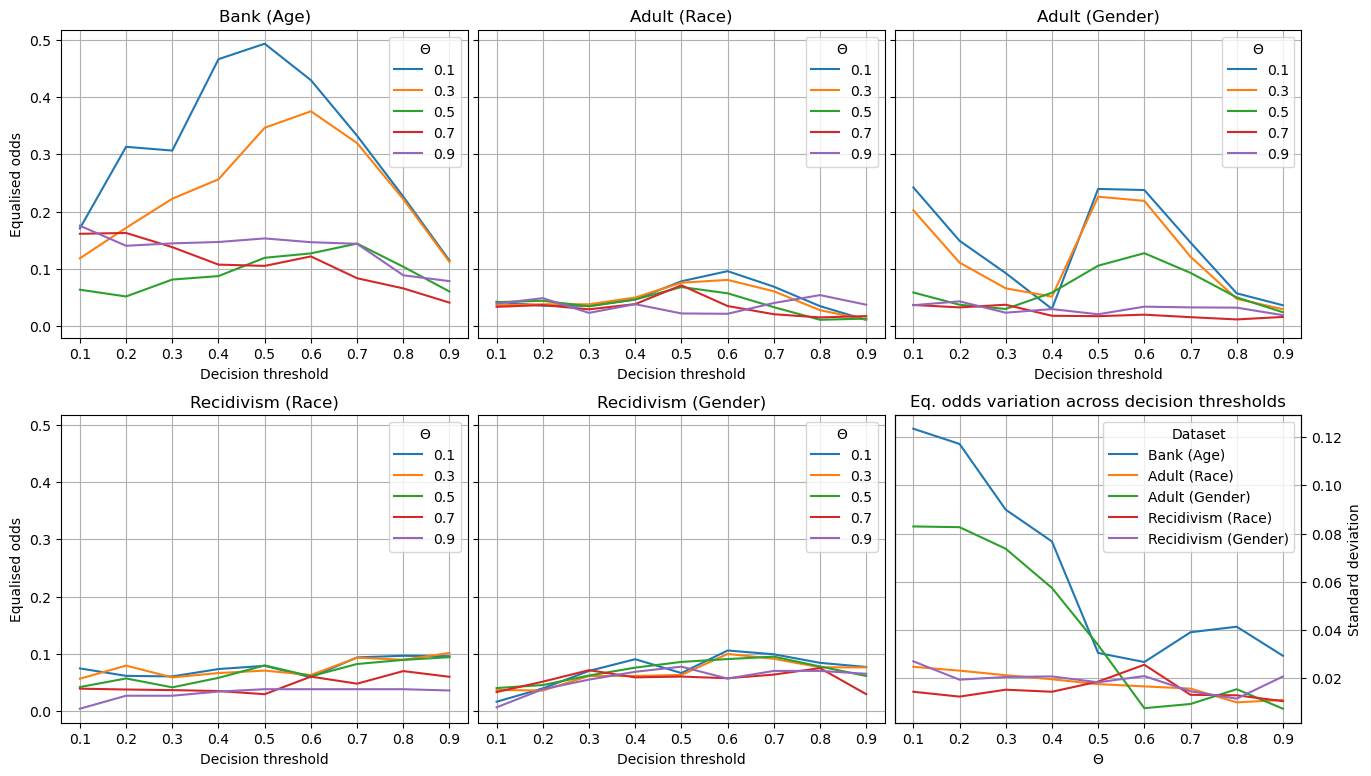

In [22]:
quantiles = np.linspace(0.1,0.9,9).round(1)
thetas = np.linspace(0.1, 0.9, 5).round(1)
fig, axs = plt.subplots(2,3,dpi=100, figsize=(16,9), sharex=False, sharey=True)
axs = axs.ravel()
for i in range(len(datasets)):
    ax = axs[i]
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
   
    for theta in thetas:    
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = abs(
                    equal_odds_tpr(s_test, y_pred, y_test) - equal_odds_fpr(s_test, y_pred, y_test)
                )
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        stdv_dem_pars = np.std(folds_dem_pars, axis=0, ddof=0) # across quantiles (9)

        ax.plot(quantiles, mean_dem_pars, label=str(theta))
        
    ax.grid()
    title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.set_title(title)
    
    ax.legend(title=r"$\Theta$")
    ax.set_xlabel("Decision threshold")
    if i in [0,3]:
        ax.set_ylabel("Equalised odds")
    
ax = axs[5].twinx()
thetas = np.linspace(0.1, 0.9, 9).round(1)
for i in range(len(datasets)):
    dataset = datasets[i]
    dataset_results_folder = scaff_results_folder + dataset + "/"
    dataset_Xys_folder = datasets_folder + dataset + "/"
    
    y = joblib.load(dataset_Xys_folder + "y.pkl")
    s = joblib.load(dataset_Xys_folder + "s.pkl")
    
    
    theta_dem_par_vars = []
    for theta in thetas:
        
        folds_dem_pars = []
        for fold in range(n_folds):            
            df_path = dataset_results_folder + str(theta) + "_" + str(fold) + ".pkl"
            df = joblib.load(df_path)
            p_test = df["p_test"]
            
            test_idx_path = dataset_Xys_folder + str(fold) + "_test_idx.pkl"
            test_idx = joblib.load(test_idx_path)
            y_test = y[test_idx]
            s_test = s[test_idx]

        
            fold_dem_pars = []
            for quantile in quantiles:
                
                th = np.quantile(p_test, quantile)
                y_pred = (p_test >= th).astype(int)
                
                dem_par = abs(
                    equal_odds_tpr(s_test, y_pred, y_test) - equal_odds_fpr(s_test, y_pred, y_test)
                )
                fold_dem_pars.append(dem_par)
            
            folds_dem_pars.append(fold_dem_pars)
        
        folds_dem_pars = np.array(folds_dem_pars)
        mean_dem_pars = np.mean(folds_dem_pars, axis=0) # across quantiles (9)
        theta_dem_par_var = np.std(mean_dem_pars, ddof=0)
        theta_dem_par_vars.append(theta_dem_par_var)
    
    var_title = dataset.split("_")[0].capitalize() + " ("  + dataset.split("_")[1].capitalize() + ")"
    ax.plot(thetas, theta_dem_par_vars, label=var_title)

ax.legend(title="Dataset")
ax.set_title("Eq. odds variation across decision thresholds")
ax.set_ylabel("Standard deviation")    
ax.grid(True, axis="y")
axs[5].grid(True, axis="x")
axs[5].set_xlabel(r"$\Theta$")
axs[5].tick_params(left=False)

plt.subplots_adjust(
    wspace=0.025, 
    hspace=0.25
)
plt.show()

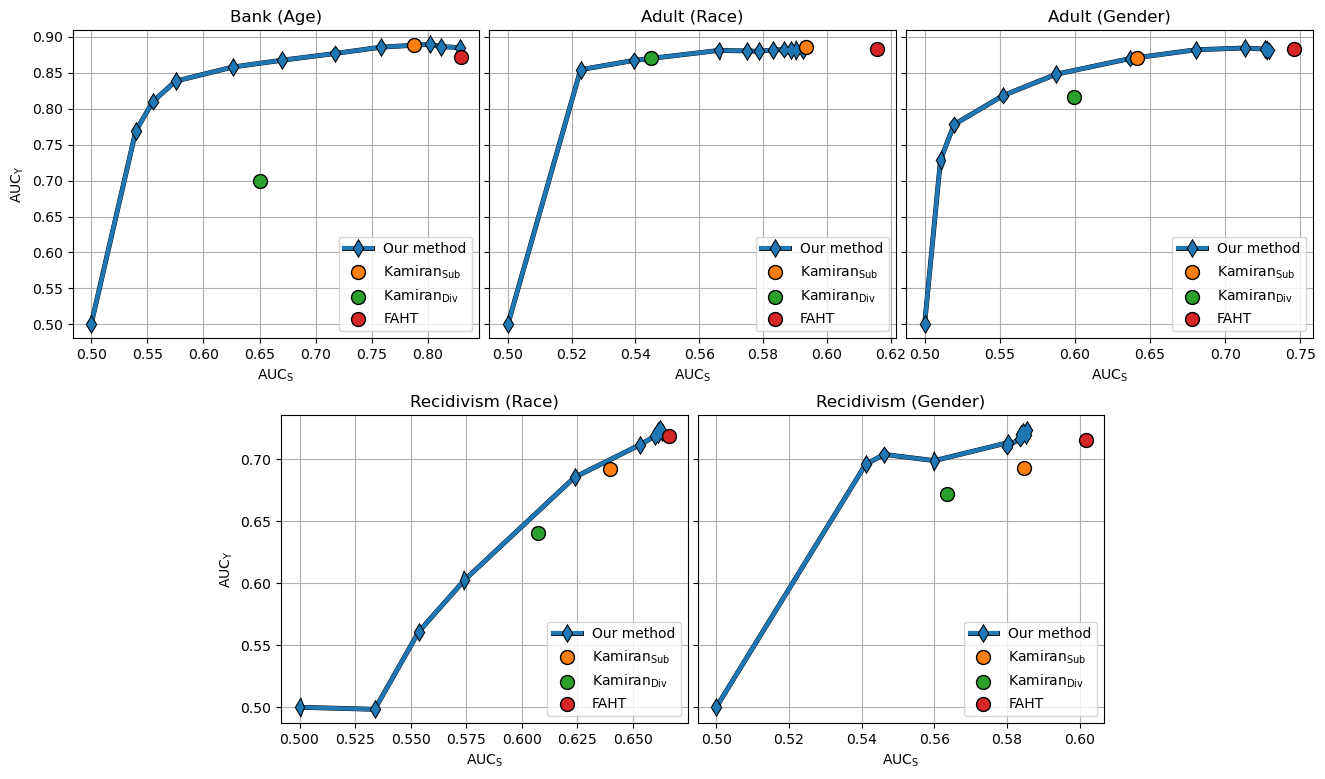

In [117]:
results = get_results(n_folds, orthogonalities, methods, datasets)
thetas = np.linspace(0.1, 0.9, 5).round(1)
fig, axs = plt.subplots(2,3,dpi=100, figsize=(16,9), sharex=False, sharey="row")
axs = axs.ravel()
i = 0
for dataset in datasets:
    ax = axs[i]
    clr_ctr = 1
    title = dataset.split("_")[0].capitalize()  + " (" + dataset.split("_")[1].capitalize() + ")"
    ax.set_title(title)
    for method in methods:
        results[method][dataset].keys()
        if method in ["local_sub"]:
            y_color = "C0"
            s_color = "C0"
            rp_color ="C0"

            label_y_test = method.split("_")[0] + "_y"
            label_s_test = method.split("_")[0] + "_s"

            y_test_auc_means = results[method][dataset]["y_test_auc_means"]
            s_test_auc_means = results[method][dataset]["s_test_auc_means"]

            ax.plot(
                s_test_auc_means, y_test_auc_means, marker="d", markersize=5, lw=3,zorder=3,
                path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
                linestyle="-", label="Our method", c=rp_color, markeredgewidth=2, #markeredgecolor="black",
            )
        else:
            y_test_auc_mean = results[method][dataset]["y_test_auc_mean"]
            s_test_auc_mean = results[method][dataset]["s_test_auc_mean"]
            if method=="faht":
                label = "FAHT"
            else:
                label = method.split("_")[0].capitalize()+ r"$_{\rm " + method.split("_")[1].capitalize() + "}$"
            ax.scatter(s_test_auc_mean, y_test_auc_mean, label=label, zorder=5, s=10**2, edgecolor="black", lw=1, marker="o", c="C"+str(clr_ctr))
            clr_ctr += 1
    ax.grid()
    ax.set_xlabel(r"$\rm{AUC_S}$")
    if i in [0,3]:
        ax.set_ylabel(r"$\rm{AUC_Y}$")
    
    ax.legend(loc="lower right")
    i += 1


axs[5].axis("off")        
plt.subplots_adjust(
    wspace=0.025, 
    hspace=0.25
)

ax0_x = axs[0].get_position().bounds[0]
ax1_x = axs[1].get_position().bounds[0]
ax2_x = axs[2].get_position().bounds[0]
ax3_x = np.mean([ax0_x, ax1_x])
ax4_x = np.mean([ax1_x, ax2_x])
ax3_bounds = [bound for bound in axs[3].get_position().bounds]
ax4_bounds = [bound for bound in axs[4].get_position().bounds]
ax3_bounds[0] = ax3_x
ax4_bounds[0] = ax4_x
axs[3].set_position(ax3_bounds)
axs[4].set_position(ax4_bounds)

plt.savefig("aucs.svg", format="svg")
plt.show()

In [110]:
ax3_bounds

[0.125, 0.10999999999999999, 0.2540983606557377, 0.34222222222222226]

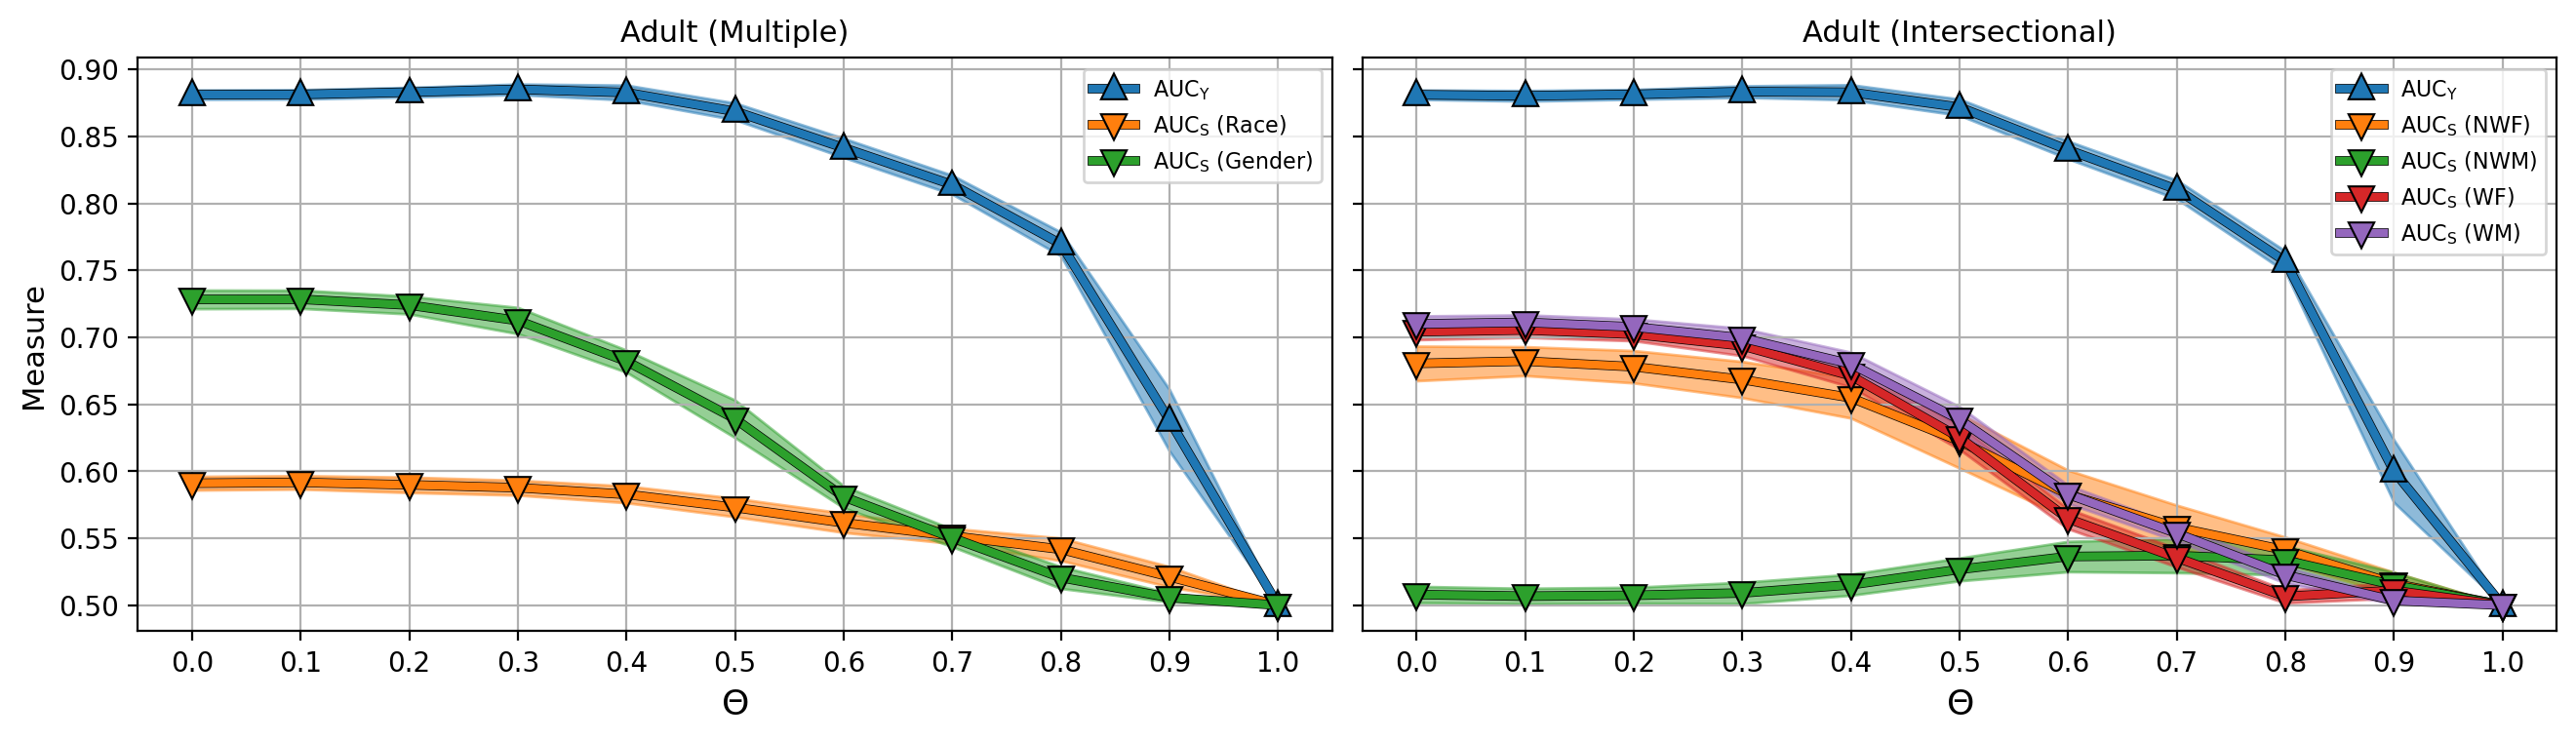

In [84]:
results = get_results(n_folds, orthogonalities, methods, ["adult_multiple_1", "adult_multiple_2"])

# adult_multiple_1
i=0
method="local_sub"
dataset="adult_multiple_1"
fig, axs = plt.subplots(1,2,dpi=200, figsize=(16,3.5*1), sharey=True, sharex=False)
suptitle = dataset.split("_")[0].capitalize()  + " (" + dataset.split("_")[1].capitalize() + ")"
axs = axs.ravel()
axs[i*2+0].grid()
axs[i*2+1].grid()
clr_ctr = 1
y_color = "C0"
s_color = "C0"
rp_color ="C0"
label_y_test = method.split("_")[0] + "_y"
label_s_test = method.split("_")[0] + "_s"
y_test_auc_means = results[method][dataset]["y_test_auc_means"]
y_test_auc_stdvs = results[method][dataset]["y_test_auc_stdvs"]
s_test_auc_means_0 = results[method][dataset]["s_test_auc_means_0"]
s_test_auc_stdvs_0 = results[method][dataset]["s_test_auc_stdvs_0"]
s_test_auc_means_1 = results[method][dataset]["s_test_auc_means_1"]
s_test_auc_stdvs_1 = results[method][dataset]["s_test_auc_stdvs_1"]

# means
axs[i*2+0].plot(
    orthogonalities, y_test_auc_means, marker="^", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm Y}$", c=y_color, markeredgewidth=2, #markeredgecolor="black",
)
axs[i*2+0].plot(
    orthogonalities, s_test_auc_means_0, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (Race)", c="C1", markeredgewidth=2, #markeredgecolor="black",
)
axs[i*2+0].plot(
    orthogonalities, s_test_auc_means_1, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (Gender)", c="C2", markeredgewidth=2, #markeredgecolor="black",
)
# stdvs
axs[i*2+0].fill_between(orthogonalities, y_test_auc_means+y_test_auc_stdvs, y_test_auc_means-y_test_auc_stdvs, alpha=0.5, color=y_color)
axs[i*2+0].fill_between(orthogonalities, s_test_auc_means_0+s_test_auc_stdvs_0, s_test_auc_means_0-s_test_auc_stdvs_0, alpha=0.5, color="C1")
axs[i*2+0].fill_between(orthogonalities, s_test_auc_means_1+s_test_auc_stdvs_1, s_test_auc_means_1-s_test_auc_stdvs_1, alpha=0.5, color="C2")

axs[i*2+0].set_xticks(np.linspace(0,1,11))
axs[i*2+0].set_xlabel(r"$\Theta$", fontsize=13)
axs[i*2+0].set_ylabel("Measure", fontsize=11)
axs[i*2+0].legend(fontsize=8, loc="upper right")#, title="Our method")
axs[i*2+0].set_title(suptitle, fontsize=11)

method="local_sub"
dataset="adult_multiple_2"
suptitle = dataset.split("_")[0].capitalize()  + " (Intersectional)"
label_y_test = method.split("_")[0] + "_y"
label_s_test = method.split("_")[0] + "_s"
y_test_auc_means = results[method][dataset]["y_test_auc_means"]
y_test_auc_stdvs = results[method][dataset]["y_test_auc_stdvs"]

s_test_auc_means_00 = results[method][dataset]["s_test_auc_means_00"]
s_test_auc_means_01 = results[method][dataset]["s_test_auc_means_01"]
s_test_auc_means_10 = results[method][dataset]["s_test_auc_means_10"]
s_test_auc_means_11 = results[method][dataset]["s_test_auc_means_11"]

s_test_auc_stdvs_00 = results[method][dataset]["s_test_auc_stdvs_00"]
s_test_auc_stdvs_01 = results[method][dataset]["s_test_auc_stdvs_01"]
s_test_auc_stdvs_10 = results[method][dataset]["s_test_auc_stdvs_10"]
s_test_auc_stdvs_11 = results[method][dataset]["s_test_auc_stdvs_11"]

# means
axs[i*2+1].plot(
    orthogonalities, y_test_auc_means, marker="^", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm Y}$", c=y_color, markeredgewidth=2, #markeredgecolor="black",
)

axs[i*2+1].plot(
    orthogonalities, s_test_auc_means_00, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (NWF)", c="C1", markeredgewidth=2, #markeredgecolor="black",
)
axs[i*2+1].plot(
    orthogonalities, s_test_auc_means_01, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (NWM)", c="C2", markeredgewidth=2, #markeredgecolor="black",
)
axs[i*2+1].plot(
    orthogonalities, s_test_auc_means_10, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (WF)", c="C3", markeredgewidth=2, #markeredgecolor="black",
)
axs[i*2+1].plot(
    orthogonalities, s_test_auc_means_11, marker="v", markersize=5, lw=3,zorder=3,
    path_effects=[pe.Stroke(linewidth=3.5, foreground="k"), pe.Normal()],
    linestyle="-", label="AUC" + r"$_{\rm S}$ (WM)", c="C4", markeredgewidth=2, #markeredgecolor="black",
)

# stdvs
axs[i*2+1].fill_between(orthogonalities, y_test_auc_means+y_test_auc_stdvs, y_test_auc_means-y_test_auc_stdvs, alpha=0.5, color=y_color)
axs[i*2+1].fill_between(orthogonalities, s_test_auc_means_00+s_test_auc_stdvs_00, s_test_auc_means_00-s_test_auc_stdvs_00, alpha=0.5, color="C1")
axs[i*2+1].fill_between(orthogonalities, s_test_auc_means_01+s_test_auc_stdvs_01, s_test_auc_means_01-s_test_auc_stdvs_01, alpha=0.5, color="C2")
axs[i*2+1].fill_between(orthogonalities, s_test_auc_means_10+s_test_auc_stdvs_10, s_test_auc_means_10-s_test_auc_stdvs_10, alpha=0.5, color="C3")
axs[i*2+1].fill_between(orthogonalities, s_test_auc_means_11+s_test_auc_stdvs_11, s_test_auc_means_11-s_test_auc_stdvs_11, alpha=0.5, color="C4")

axs[i*2+1].set_xticks(np.linspace(0,1,11))
axs[i*2+1].set_xlabel(r"$\Theta$", fontsize=13)
#axs[i*2+1].set_ylabel("Measure", fontsize=11)
axs[i*2+1].legend(fontsize=8, loc="upper right")#, title="Our method")
axs[i*2+1].set_title(suptitle, fontsize=11)


#axs[i*2+1].yaxis.set_tick_params(labelright=True)
#axs[i*2+1].yaxis.tick_right()
#axs[i*2+1].yaxis.set_label_position("right")
ymin, ymax = axs[i*2+0].get_ylim()
axs[i*2+1].set_ylim(ymin, ymax)
axs[i*2+1].legend(loc="upper right" ,fontsize=8)

plt.subplots_adjust(
    top=.95,
    wspace=0,
    hspace=0.3
)

plt.subplots_adjust(
    wspace=0.025, 
    hspace=0.25
)

plt.savefig("2d_results_1"+".svg", format="svg")
plt.show()